# Penguin Species Detection using Sklearn- By Sujan Neupane

In [2]:
# Lets import all our necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Using pandas to read the data file
penguins = pd.read_csv("https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv")

In [93]:
penguins.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [180]:
df = pd.DataFrame(penguins)
df.dropna(inplace = True)
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [121]:
x = dict(df.species.value_counts())
species = list(x)
species

['Adelie', 'Gentoo', 'Chinstrap']

In [122]:
feature_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
X = df[feature_cols].values
y = list(df.species.values)

In [123]:
indexes = [0,1,2]
y = np.array([indexes[species.index(i)] for i in y])

In [124]:
print(X.shape)
print(y.shape)

(333, 4)
(333,)


# We will use KNN model for this problem 
    # TRAIN_TEST_SPLIT is used to simulate the prediction based on off-sample Data

In [125]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 1, test_size=0.5)

In [126]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(166, 4)
(167, 4)
(166,)
(167,)


In [143]:
# When K = 1 
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [144]:
pred = knn.predict([[39.1,18.7,181.0,3750.0]])
species[int(pred)]

'Adelie'

In [145]:
y_pred = knn.predict(x_test)

In [146]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7544910179640718

In [147]:
# When k = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.7245508982035929

# Lets find out the best value of k

In [150]:
score = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    score.append(metrics.accuracy_score(y_test,y_pred))

In [153]:
np.array(score).mean()

0.7150698602794412

In [155]:
score.index(max(score))

0

In [172]:
print('when k = '+str(score.index(max(score))+1)+ ' ,the accuracy is highest for this model')

when k = 1 ,the accuracy is highest for this model


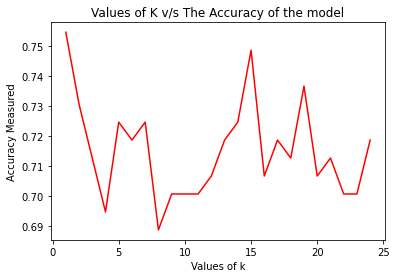

In [159]:
plt.plot(range(1,25),score,color='red')
plt.title('Values of K v/s The Accuracy of the model')
plt.xlabel('Values of k')
plt.ylabel('Accuracy Measured')
plt.show()

Our best accuracy for this module is 75.5 % at the best, which is not so good. 

In [165]:
print(list(df.body_mass_g)[0:20])

[3750.0, 3800.0, 3250.0, 3450.0, 3650.0, 3625.0, 4675.0, 3200.0, 3800.0, 4400.0, 3700.0, 3450.0, 4500.0, 3325.0, 4200.0, 3400.0, 3600.0, 3800.0, 3950.0, 3800.0]


What if we don't use the weight column, as we can clearly see from above data that the body mass has comparatively
high variance than other properties

# So, lets see by excluding body mass

In [166]:
feature_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm']
X = df[feature_cols].values

In [167]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 1, test_size=0.5)

In [168]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(166, 3)
(167, 3)
(166,)
(167,)


In [169]:
# When K = 1 
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [170]:
y_pred = knn.predict(x_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9520958083832335

While including body mass, we achieved 75 % accuracy at most and
K=1; However, We achieved accuracy over 95 % while excluding mody mass when k =1. So, let's measure our highest accuracy of this updated model with respect to different values of k

# Lets find out the best value of k

In [174]:
score = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    score.append(metrics.accuracy_score(y_test,y_pred))

In [175]:
print('when k = '+str(score.index(max(score))+1)+ ' ,the accuracy is highest for this model')

when k = 1 ,the accuracy is highest for this model


# Well, the updated model is also most accurate when k =1

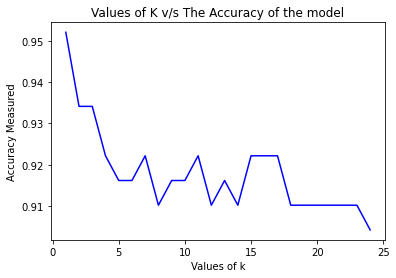

In [179]:
# Lets plot the new accuracies in graph
plt.plot(range(1,25),score,color='blue')
plt.title('Values of K v/s The Accuracy of the model')
plt.xlabel('Values of k')
plt.ylabel('Accuracy Measured')
plt.show()

Hence, it is best concluded that this model is most accurate when k=1, and when body mass property is excluded respectively.

# Lets use cross validation instead of train_test_split

In [183]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn,X,y, cv=10,scoring='accuracy')
scores

array([0.91176471, 1.        , 0.97058824, 1.        , 0.90909091,
       0.96969697, 1.        , 0.96969697, 0.93939394, 0.96969697])

In [184]:
scores.mean()

0.9639928698752229

In [185]:
# Now, lets search for the best value of k
k_scores = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn,X,y, cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9670231729055259, 0.9700534759358288, 0.967023172905526, 0.9699643493761141, 0.9639928698752229, 0.9549019607843136, 0.9579322638146166, 0.9549019607843137, 0.9518716577540106, 0.9488413547237077, 0.9518716577540107, 0.9488413547237077, 0.9488413547237077, 0.9458110516934045, 0.9488413547237077, 0.9457219251336898, 0.9427807486631016, 0.9457219251336898, 0.9427807486631016, 0.9426916221033869, 0.9457219251336898, 0.9457219251336898, 0.9427807486631016, 0.9427807486631016, 0.9427807486631016, 0.9427807486631016, 0.9427807486631016, 0.9398395721925134, 0.9457219251336898, 0.9458110516934047]


In [186]:
print(k_scores.index(max(k_scores))+1)

2


In [190]:
print('when k = '+str(k_scores.index(max(k_scores))+1)+ ' ,the accuracy is highest for this model using cross-validation.')

when k = 2 ,the accuracy is highest for this model using cross-validation.


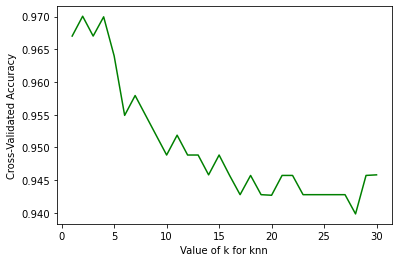

In [192]:
import matplotlib.pyplot as plt
#plot the value of k for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(range(1,31),k_scores,color='green')
plt.xlabel("Value of k for knn")
plt.ylabel("Cross-Validated Accuracy")
plt.show()

# Thank you